## GRIP : TFS Training

# Task 3

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [5]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [15]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# 1. Minimum number of Sales from which State?

In [85]:
state_sales = pd.pivot_table(data=df[['State','Sales']], 
                        index=['State'], 
                        values='Sales',
                        aggfunc='max')


ss_sorted = state_sales.sort_values(by='Sales')
ss_sorted.head(10)

,Sales
State,
Kansas,360.380
South Dakota,416.320
Maine,437.850
West Virginia,673.344
North Dakota,704.760
New Mexico,883.840
Idaho,1128.390
Connecticut,1133.350
District of Columbia,1379.920


<AxesSubplot:title={'center':'state vs sales'}, xlabel='states', ylabel='sales'>

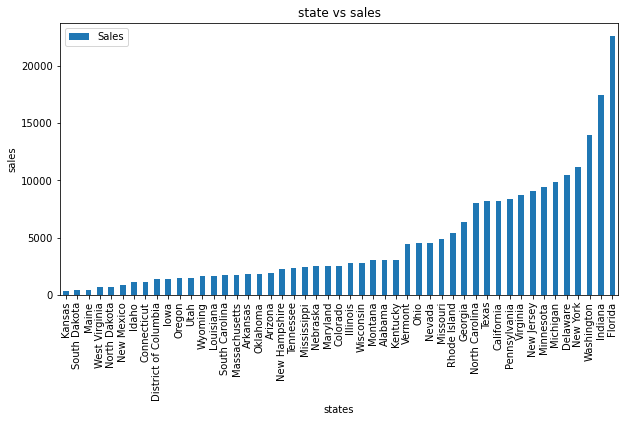

In [86]:
ss_sorted.plot(kind='bar', title='state vs sales', ylabel='sales',
         xlabel='states', figsize=(10, 5))

# Conclusion: From Kansas we got minimum sales.

# 2. From which State we got minimum profit?

In [87]:
state_profit = pd.pivot_table(data=df[['State','Profit']], 
                        index=['State'], 
                        values='Profit',
                        aggfunc='max')
sp_sorted = state_profit.sort_values(by='Profit')
sp_sorted.head(10)

,Profit
State,
Wyoming,100.1960
Maine,131.3550
South Dakota,132.5898
New Mexico,138.3552
Kansas,149.3820
North Dakota,162.0948
Arizona,211.4955
West Virginia,219.4416
Tennessee,223.9936


<AxesSubplot:title={'center':'state vs profit'}, xlabel='states', ylabel='profit'>

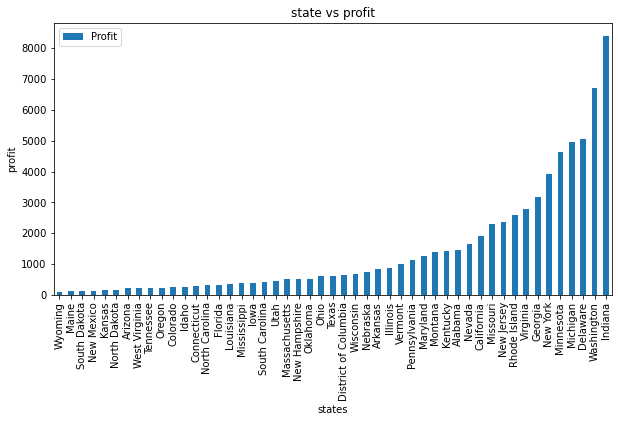

In [88]:
sp_sorted.plot(kind='bar', title='state vs profit', ylabel='profit',
         xlabel='states', figsize=(10, 5))

# Conclusion: From Wyoming we got minimum profit.

# 3. Which shipping mode does customer choose based on the products category and sum of the quantity?

In [83]:
ship_mode = pd.pivot_table(data=df[['Ship Mode','Category','Quantity']], 
                        index=['Ship Mode','Category'], 
                        values='Quantity',
                        aggfunc='sum')


sm_sorted = ship_mode.sort_values(by='Ship Mode', ascending=False)
sm_sorted

Quantity
Ship Mode      Category                 
Standard Class Furniture            4768
               Office Supplies     13907
               Technology           4122
Second Class   Furniture            1569
               Office Supplies      4480
               Technology           1374
Same Day       Furniture             453
               Office Supplies      1147
               Technology            360
First Class    Furniture            1238
               Office Supplies      3372
               Technology           1083

<AxesSubplot:title={'center':'Ship Mode vs Sum of Quantity'}, xlabel='Ship Mode with Category', ylabel='Sum of Quantity'>

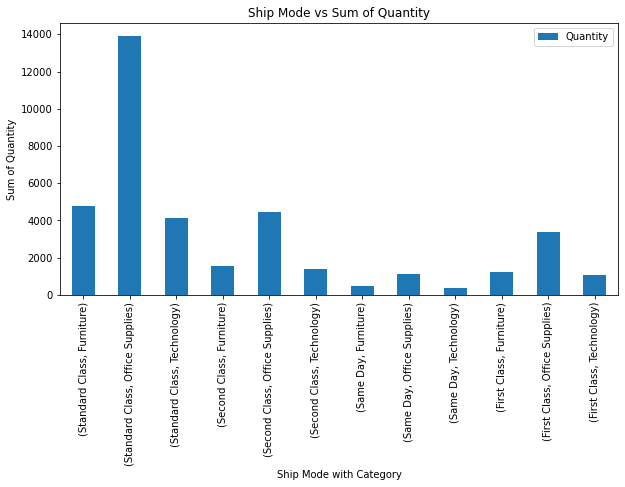

In [84]:
sm_sorted.plot(kind='bar', title='Ship Mode vs Sum of Quantity', ylabel='Sum of Quantity',
         xlabel='Ship Mode with Category', figsize=(10, 5))

# Conclusion: Most of the customers prefer to choose Standard mode for shipping while compared to other modes.

# 5. Which Products are purchased in less quantity?

In [89]:
Category_quantity = pd.pivot_table(data=df[['Category','Sub-Category','Quantity']], 
                        index=['Category','Sub-Category'], 
                        values='Quantity',
                        aggfunc='sum')

cq_sorted = Category_quantity.sort_values(by='Quantity')
cq_sorted

Quantity
Category        Sub-Category          
Technology      Copiers            234
                Machines           440
Office Supplies Supplies           647
Furniture       Bookcases          868
Office Supplies Envelopes          906
                Fasteners          914
Furniture       Tables            1241
Office Supplies Labels            1400
                Appliances        1729
Furniture       Chairs            2356
Technology      Accessories       2976
Office Supplies Art               3000
                Storage           3158
Technology      Phones            3289
Furniture       Furnishings       3563
Office Supplies Paper             5178
                Binders           5974

<AxesSubplot:title={'center':'Category vs Sum of Quantity'}, xlabel='Category', ylabel='Sum of Quantity'>

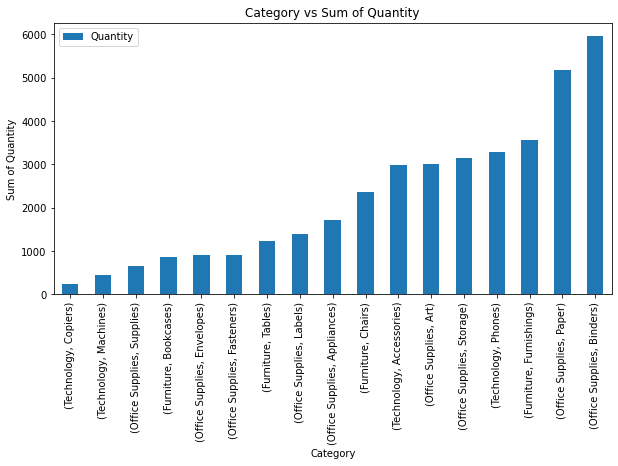

In [90]:
cq_sorted.plot(kind='bar', title='Category vs Sum of Quantity', ylabel='Sum of Quantity',
         xlabel='Category', figsize=(10, 5))

# Conclusion: Copiers from Technology category are purchased in less quantity.


# 6. By selling which products we got the minimum profit?


In [93]:
product_profit = pd.pivot_table(data=df[['Category','Sub-Category','Profit']], 
                        index=['Category','Sub-Category'], 
                        values='Profit',
                        aggfunc='max')

pp_sorted = product_profit.sort_values(by='Profit')
pp_sorted

Profit
Category        Sub-Category           
Office Supplies Fasteners       21.8880
                Art            112.5740
                Envelopes      204.0714
                Supplies       327.5060
                Paper          352.2960
                Labels         385.3752
Furniture       Furnishings    387.5676
                Tables         629.0100
                Chairs         770.3520
Office Supplies Storage        792.2691
                Appliances     793.7160
Technology      Accessories    829.3754
Furniture       Bookcases     1013.1270
Technology      Phones        1228.1787
                Machines      2799.9840
Office Supplies Binders       4946.3700
Technology      Copiers       8399.9760

<AxesSubplot:title={'center':'Category vs Maximum Profit'}, xlabel='Category', ylabel='Maximum Profit'>

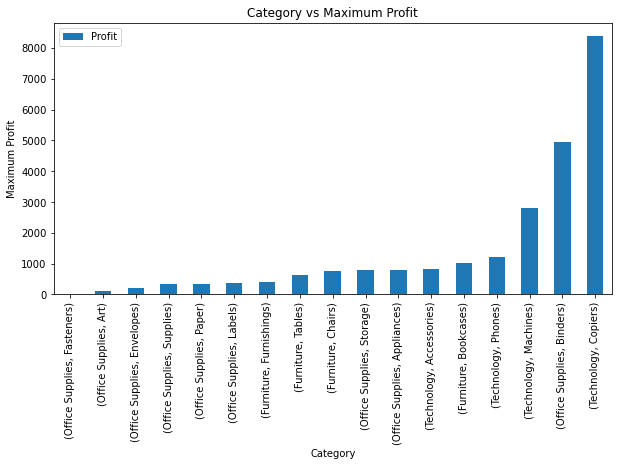

In [94]:
pp_sorted.plot(kind='bar', title='Category vs Maximum Profit', ylabel='Maximum Profit',
         xlabel='Category', figsize=(10, 5))

# Conclusion: By selling Fasteners from Office Supplies category we got the minimum profit.
